<a href="https://colab.research.google.com/github/mbmb7777/woong/blob/main/Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.chdir('/content')
print(" Current Working Directory")
% pwd

 Current Working Directory


'/content'

In [ ]:
# Common imports
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


KeyboardInterrupt: ignored

In [ ]:
# Download a file based on its file ID
file_id = '1bljNTBDZr701KXs8wfPB6KAyi8dtM8QG'
download = drive.CreateFile({'id': file_id})
download.GetContentFile('data.zip')
print('Downloaded Data File')

In [ ]:
data_dir = '/content/drive/MyDrive/2nd_test/2nd_test'
merged_data = pd.DataFrame()

# Looping over all files from 12th Feb to 19th Feb
for filename in os.listdir(data_dir):
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
    dataset_mean_abs.index = [filename]
    merged_data = merged_data.append(dataset_mean_abs)
    
# Renaming columns
merged_data.columns = ['Bearing 1','Bearing 2','Bearing 3','Bearing 4']
# Identifying index as datetime format
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()
merged_data.to_csv('merged_dataset_BearingTest_2.csv')

In [ ]:
# Check - Begining of Data
merged_data.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


In [ ]:
# Check - End of Data
merged_data.tail()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-19 05:42:39,0.453335,0.161016,0.137440,0.119047
2004-02-19 05:52:39,0.337583,0.132400,0.144992,0.092125
2004-02-19 06:02:39,0.351111,0.152266,0.151299,0.100817
2004-02-19 06:12:39,0.001857,0.003732,0.003656,0.001786
2004-02-19 06:22:39,0.001168,0.000767,0.000716,0.001699


In [ ]:
#Check Total Points
print(f'Total Data Points {merged_data.shape[0] + 1}')

Total Data Points 985


Text(2004-02-19 06:12:39, 0.3, 'Breakdown of Bearing 1')

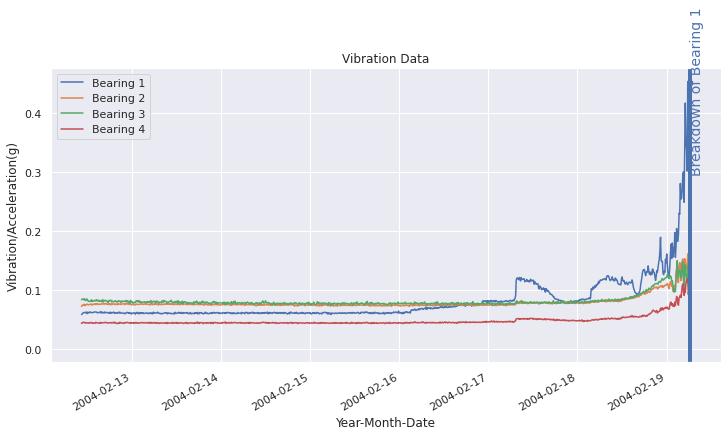

In [ ]:
# Visualising Data
ax = merged_data.plot(figsize = (12,6), title="Vibration Data" , legend = True)
ax.set(xlabel="Year-Month-Date", ylabel="Vibration/Acceleration(g)")
plt.axvline(x='2004-02-19 06:12:39', linewidth=4, color='b', label ="Breakdown of Bearing 1")
plt.text('2004-02-19 06:12:39',0.3,'Breakdown of Bearing 1',rotation=90, fontsize=14, color='b')

[Text(0, 0.5, 'Vibration/Acceleration(g)'), Text(0.5, 0, 'Month-Date Time')]

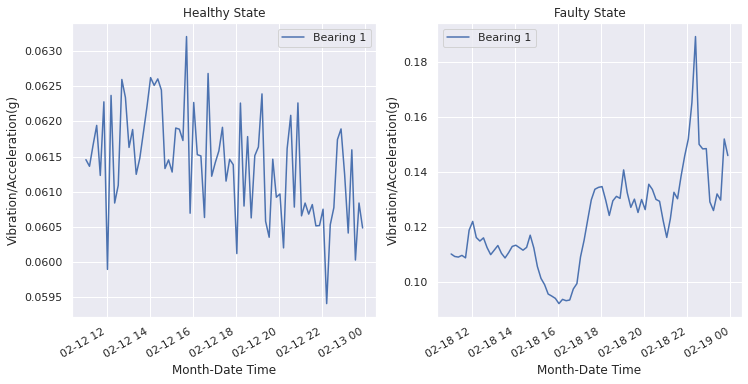

In [ ]:
fig = plt.figure()

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(121)
# Divide the figure into a 1x2 grid, and give me the second section
ax2 = fig.add_subplot(122)

healthy = merged_data['2004-02-12 11:02:39':'2004-02-12 23:52:39']
healthy['Bearing 1'].plot(figsize = (12,6), title="Healthy State" , legend = True, ax=ax1)
ax1.set(xlabel="Month-Date Time", ylabel="Vibration/Acceleration(g)")

faulty = merged_data['2004-02-18 11:02:39':'2004-02-18 23:52:39']
ax2 = faulty['Bearing 1'].plot(figsize = (12,6), title="Faulty State" , legend = True, ax= ax2)
ax2.set(xlabel="Month-Date Time", ylabel="Vibration/Acceleration(g)")



In [ ]:
from fbprophet import Prophet

In [ ]:
healthy_bearing1 = merged_data['2004-02-12 10:32:39':'2004-02-15 23:42:39']['Bearing 1']

# Creating training dataframe
prophet_healthy_train = pd.DataFrame()
prophet_healthy_train['ds'] = healthy_bearing1.index
prophet_healthy_train['y'] = healthy_bearing1.values

prophet_healthy_train.head()

,ds,y
0,2004-02-12 10:32:39,0.058333
1,2004-02-12 10:42:39,0.058995
2,2004-02-12 10:52:39,0.060236
3,2004-02-12 11:02:39,0.061455
4,2004-02-12 11:12:39,0.061361


In [ ]:
m = Prophet(interval_width = 1)
# Using the training data from "healthy part"
m.fit(prophet_healthy_train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
healthy_bearing1

2004-02-12 10:32:39    0.058333
2004-02-12 10:42:39    0.058995
2004-02-12 10:52:39    0.060236
2004-02-12 11:02:39    0.061455
2004-02-12 11:12:39    0.061361
                         ...   
2004-02-15 23:02:39    0.062390
2004-02-15 23:12:39    0.062485
2004-02-15 23:22:39    0.061558
2004-02-15 23:32:39    0.061188
2004-02-15 23:42:39    0.061323
Name: Bearing 1, Length: 512, dtype: float64

Displaying Prophet plot


[Text(45.125, 0.5, 'Vibration/Acceleration(g)'),
 Text(0.5, 30.5, 'Month (MM)-Date(DD) Time')]

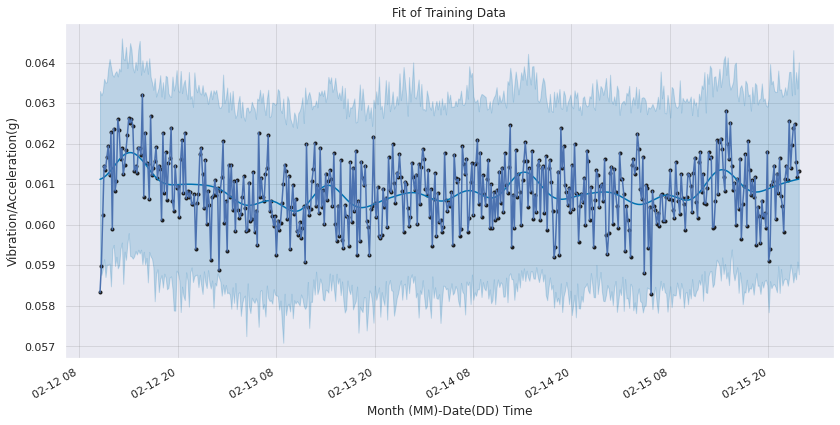

In [ ]:
forecast = m.predict(prophet_healthy_train)
forecast['fact'] = prophet_healthy_train['y'].reset_index(drop = True)
print('Displaying Prophet plot')
fig1 = m.plot(forecast)
fig1 = healthy_bearing1.plot(figsize = (12,6), title="Fit of Training Data")
fig1.set(xlabel="Month (MM)-Date(DD) Time", ylabel="Vibration/Acceleration(g)")


Displaying Prophet plot


Text(731624.875, 0.057, 'Actual/Healthy')

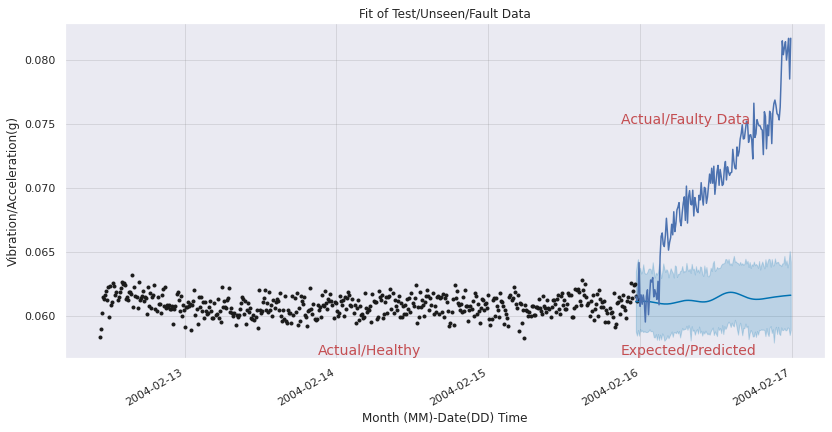

In [ ]:
prophet_faultydata = merged_data['2004-02-15 23:22:39':'2004-02-16 23:52:39']['Bearing 1']
prophet_faultydata.head()

prophet_faulty_test = pd.DataFrame()

prophet_faulty_test['ds'] = prophet_faultydata.index
#pd.to_datetime(prophet_healthy.index, format='%Y.%m.%d.%H.%M.%S')
prophet_faulty_test['y'] = prophet_faultydata.values

forecast = m.predict(prophet_faulty_test)
forecast['fact'] = prophet_faulty_test['y'].reset_index(drop = True)
print('Displaying Prophet plot')
fig1 = m.plot(forecast)
fig1 = prophet_faultydata.plot(figsize = (12,6),title="Fit of Test/Unseen/Fault Data")
fig1.set(xlabel="Month (MM)-Date(DD) Time", ylabel="Vibration/Acceleration(g)")
fig1.text(731626.875,0.057,'Expected/Predicted', fontsize=14, color='r')
fig1.text(731626.875,0.075,'Actual/Faulty Data', fontsize=14, color='r')
fig1.text(731624.875,0.057,'Actual/Healthy', fontsize=14, color='r')

In [ ]:
# Healper functions to annotate the graph.
print(fig1.get_xticks())
print(fig1.get_yticks())

[731624. 731625. 731626. 731627. 731628.]
[0.055 0.06  0.065 0.07  0.075 0.08  0.085]


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
143,2004-02-16 23:12:39,0.061589,0.058895,0.064337
144,2004-02-16 23:22:39,0.061597,0.059099,0.063787
145,2004-02-16 23:32:39,0.061605,0.059058,0.064178
146,2004-02-16 23:42:39,0.061611,0.058514,0.065065
147,2004-02-16 23:52:39,0.061617,0.058912,0.064225
